In [1]:
import os
import sys
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Define the file paths
# GENERALIZED BORN and POISSON BOLTZMANN ENERGY FILE
mmpbsa_fh = "/home/shrikant/Projects/dev_project/gromacs/data/FINAL_RESULTS_MMPBSA.csv"
# READ THE FILE AND CREATE A DATAFRAME
mmpbsa_df = pd.read_csv(mmpbsa_fh, sep= ',' ,header=None)

In [107]:
# Step 1: Read the entire CSV file as a DataFrame without assuming headers
df = pd.read_csv(mmpbsa_fh, header=None)

# Step 2: Find the indices where each section starts
gb_complex_energy_index = df[df[0] == 'Complex Energy Terms'].index[0]
gb_receptor_energy_index = df[df[0] == 'Receptor Energy Terms'].index[0]
gb_ligand_energy_index = df[df[0] == 'Ligand Energy Terms'].index[0]
gb_delta_energy_index = df[df[0] == 'Delta Energy Terms'].index[0]

# Step 3: Find the index where "POISSON BOLTZMANN" starts (to stop reading after that)
poisson_boltzmann_index = df[df[0] == 'POISSON BOLTZMANN:'].index[0]

# Step 4: Extract data of GENERALIZED BORN for "Complex Energy Terms"
gb_df_complex_energy = df.iloc[gb_complex_energy_index + 2: gb_receptor_energy_index - 1]
gb_df_complex_energy.columns = df.iloc[gb_complex_energy_index + 1]  # Set headers as row after "Complex Energy Terms"

# Step 5: Extract of GENERALIZED BORN data for "Receptor Energy Terms"
gb_df_receptor_energy = df.iloc[gb_receptor_energy_index + 2: gb_ligand_energy_index-1]
gb_df_receptor_energy.columns = df.iloc[gb_receptor_energy_index + 1]  # Set headers as row after "Receptor Energy Terms"

# Step 6: Extract of GENERALIZED BORN data for "Ligand Energy Terms"
gb_df_ligand_energy = df.iloc[gb_ligand_energy_index + 2: gb_delta_energy_index-1]
gb_df_ligand_energy.columns = df.iloc[gb_ligand_energy_index + 1]  # Set headers as row after "Ligand Energy Terms"

# Step 7: Extract of GENERALIZED BORN data for "Delta Energy Terms"
gb_df_delta_energy = df.iloc[gb_delta_energy_index + 2: poisson_boltzmann_index-2]
gb_df_delta_energy.columns = df.iloc[gb_delta_energy_index + 1]  # Set headers as row after "Delta Energy Terms"

# Print the extracted dataframes for each section
print(f"GENERALIZED BORN: COMPLEX ENERGY INDEX:{gb_complex_energy_index}\nGENERALIZED BORN: RECEPTOR ENERGY INDEX:{gb_receptor_energy_index}\n\
GENERALIZED BORN: LIGAND ENERGY INDEX:{gb_ligand_energy_index}\nGENERALIZED BORN: DELTA ENERGY INDEX:{gb_delta_energy_index}")

GENERALIZED BORN: COMPLEX ENERGY INDEX:1
GENERALIZED BORN: RECEPTOR ENERGY INDEX:1805
GENERALIZED BORN: LIGAND ENERGY INDEX:3609
GENERALIZED BORN: DELTA ENERGY INDEX:5413


In [4]:
print(f"GENERALIZED BORN COMPLEX ENERGY INDEX: {gb_complex_energy_index} GENERALIZED BORN: RECEPTOR ENERGY INDEX:{gb_receptor_energy_index-2}")
gb_df_complex_energy

GENERALIZED BORN COMPLEX ENERGY INDEX: 1 GENERALIZED BORN: RECEPTOR ENERGY INDEX:1803


2,Frame #,BOND,ANGLE,DIHED,VDWAALS,EEL,1-4 VDW,1-4 EEL,EGB,ESURF,GGAS,GSOLV,TOTAL,NaN
3,41000,502.46,1122.76,1535.61,-1136.24,-5937.2,550.63,1657.79,-5221.06,63.59,-1704.19,-5157.47,-6861.66,NaN
4,41005,448.88,1184.04,1534.89,-1164.27,-5851.61,543.94,1620.81,-5259.8,62.57,-1683.32,-5197.23,-6880.55,NaN
5,41010,514.09,1155.25,1537.34,-1123.77,-5849.29,545.04,1669.12,-5295.31,64.56,-1552.22,-5230.75,-6782.97,NaN
6,41015,520.99,1136.52,1558.12,-1152.35,-5859.59,547.86,1669.5,-5295.91,63.68,-1578.96,-5232.22,-6811.18,NaN
7,41020,490.63,1158.52,1530.18,-1142.69,-5809.15,555.15,1645.36,-5324.08,62.71,-1571.99,-5261.37,-6833.36,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,49980,511.43,1148.82,1518.88,-1148.5,-5696.98,558.12,1648.85,-5426.65,64.54,-1459.36,-5362.1,-6821.47,NaN
1800,49985,489.94,1135.49,1513.8,-1142.52,-5762,555.32,1621.39,-5373.41,62.31,-1588.58,-5311.1,-6899.68,NaN
1801,49990,468.72,1152.61,1523.41,-1163.12,-5663.3,562.79,1601.09,-5400.76,63.16,-1517.8,-5337.6,-6855.4,NaN
1802,49995,491.57,1173.6,1535.72,-1152.31,-5780.88,551.66,1621.27,-5352.48,62.52,-1559.37,-5289.97,-6849.34,NaN


In [5]:
print(f"GENERALIZED BORN RECEPTOR ENERGY INDEX: {gb_receptor_energy_index+2} GENERALIZED BORN: LIGAND ENERGY INDEX:{gb_ligand_energy_index-2}")
gb_df_receptor_energy

GENERALIZED BORN RECEPTOR ENERGY INDEX: 1807 GENERALIZED BORN: LIGAND ENERGY INDEX:3607


1806,Frame #,BOND,ANGLE,DIHED,VDWAALS,EEL,1-4 VDW,1-4 EEL,EGB,ESURF,GGAS,GSOLV,TOTAL,NaN
1807,41000,287.65,732.17,935.74,-673.24,-6854.98,340.07,4869.3,-1529.17,40.19,-363.29,-1488.98,-1852.26,NaN
1808,41005,257.17,771.7,942.38,-684.59,-6810.22,336.53,4842.29,-1525.11,39.79,-344.75,-1485.32,-1830.07,NaN
1809,41010,301.13,777.42,946.96,-655.27,-6836.84,335.66,4881.68,-1548.89,41.42,-249.25,-1507.46,-1756.71,NaN
1810,41015,302.51,748.52,975.14,-683.37,-6807.87,330.4,4879.08,-1561.05,41.33,-255.59,-1519.73,-1775.31,NaN
1811,41020,276.98,756.74,942.92,-677.23,-6823.06,335.22,4860.28,-1533.71,40.7,-328.15,-1493.01,-1821.16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,49980,282.36,741.7,942.33,-663.13,-6713.44,341.47,4877.77,-1633.84,42.73,-190.93,-1591.11,-1782.03,NaN
3604,49985,268.99,733.51,940.71,-662.68,-6753.34,337.23,4834.89,-1584.32,41.25,-300.69,-1543.07,-1843.76,NaN
3605,49990,273.36,755.93,939.37,-670.46,-6663.33,349.37,4822.27,-1635.82,42.27,-193.49,-1593.55,-1787.04,NaN
3606,49995,281.91,760.39,938.4,-676.21,-6758.12,336.06,4837.77,-1559.94,41.2,-279.79,-1518.74,-1798.53,NaN


In [6]:
print(f"GENERALIZED BORN LIGAND ENERGY INDEX: {gb_ligand_energy_index+2} GENERALIZED BORN: DELTA ENERGY INDEX:{gb_delta_energy_index-2}")
gb_df_ligand_energy

GENERALIZED BORN LIGAND ENERGY INDEX: 3611 GENERALIZED BORN: DELTA ENERGY INDEX:5411


3610,Frame #,BOND,ANGLE,DIHED,VDWAALS,EEL,1-4 VDW,1-4 EEL,EGB,ESURF,GGAS,GSOLV,TOTAL,NaN
3611,41000,214.81,390.59,599.87,-410.76,3659.46,210.56,-3211.51,-6460.65,32.6,1453.01,-6428.05,-4975.04,NaN
3612,41005,191.71,412.33,592.52,-419.99,3724.33,207.41,-3221.48,-6526.7,32.37,1486.83,-6494.33,-5007.5,NaN
3613,41010,212.96,377.83,590.38,-410.53,3715.22,209.38,-3212.57,-6503.45,32.49,1482.67,-6470.96,-4988.3,NaN
3614,41015,218.47,387.99,582.98,-413.7,3662.42,217.46,-3209.58,-6472.62,32.28,1446.05,-6440.33,-4994.29,NaN
3615,41020,213.65,401.79,587.26,-410.75,3837.86,219.93,-3214.92,-6628.61,32.16,1634.82,-6596.45,-4961.63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,49980,229.08,407.12,576.55,-423.51,3863.74,216.65,-3228.92,-6647.18,31.88,1640.7,-6615.3,-4974.59,NaN
5408,49985,220.95,401.98,573.09,-409.25,3780.73,218.09,-3213.51,-6591.77,32.11,1572.09,-6559.66,-4987.57,NaN
5409,49990,195.36,396.67,584.04,-434.17,3884.17,213.41,-3221.17,-6654.72,31.64,1618.32,-6623.08,-5004.76,NaN
5410,49995,209.66,413.21,597.32,-412.59,3781.76,215.6,-3216.5,-6601.14,32.06,1588.45,-6569.09,-4980.64,NaN


In [7]:
print(f"GENERALIZED BORN DELTA ENERGY INDEX: {gb_delta_energy_index+2} POISSON BOLTZMANN INDEX:{poisson_boltzmann_index-2}")
gb_df_delta_energy

GENERALIZED BORN DELTA ENERGY INDEX: 5415 POISSON BOLTZMANN INDEX:7216


5414,Frame #,BOND,ANGLE,DIHED,VDWAALS,EEL,1-4 VDW,1-4 EEL,EGB,ESURF,GGAS,GSOLV,TOTAL,NaN
5415,41000,0,0,0,-52.24,-2741.67,0,0,2768.75,-9.2,-2793.91,2759.55,-34.36,NaN
5416,41005,0,0,0,-59.69,-2765.72,0,0,2792.01,-9.59,-2825.41,2782.42,-42.98,NaN
5417,41010,0,0,0,-57.97,-2727.67,0,0,2757.02,-9.34,-2785.64,2747.68,-37.96,NaN
5418,41015,0,0,0,-55.28,-2714.14,0,0,2737.77,-9.93,-2769.42,2727.84,-41.58,NaN
5419,41020,0,0,0,-54.72,-2823.94,0,0,2838.24,-10.16,-2878.66,2828.09,-50.57,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,49980,0,0,0,-61.86,-2847.28,0,0,2854.36,-10.06,-2909.14,2844.3,-64.84,NaN
7212,49985,0,0,0,-70.59,-2789.39,0,0,2802.69,-11.05,-2859.98,2791.63,-68.35,NaN
7213,49990,0,0,0,-58.48,-2884.14,0,0,2889.78,-10.76,-2942.63,2879.02,-63.6,NaN
7214,49995,0,0,0,-63.51,-2804.52,0,0,2808.6,-10.74,-2868.03,2797.86,-70.17,NaN


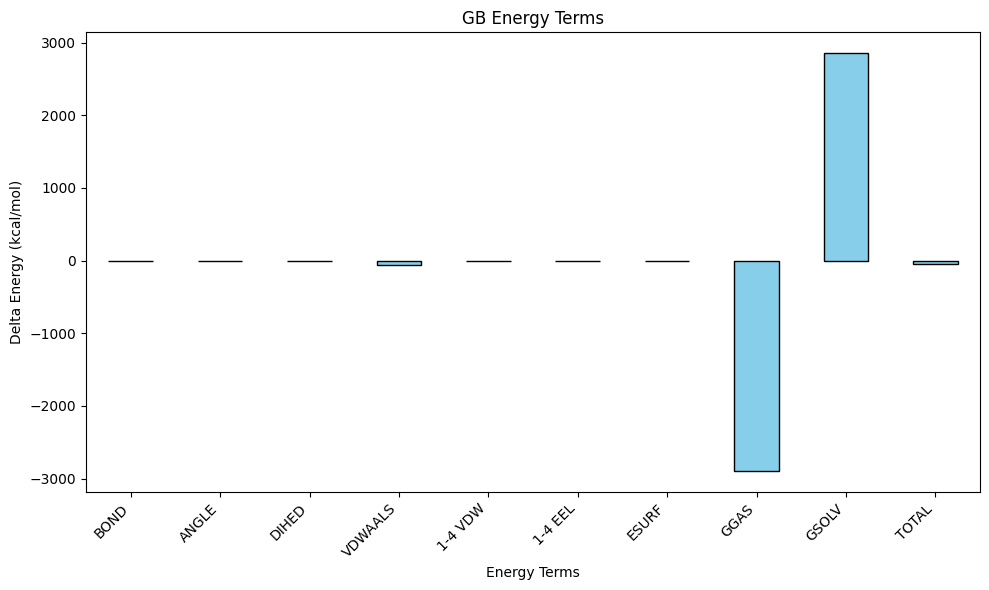

In [110]:
# Average columns from the dataframe
gb_columns = ['BOND', 'ANGLE', 'DIHED', 'VDWAALS', '1-4 VDW', '1-4 EEL', 'ESURF', 'GGAS', 'GSOLV', 'TOTAL']

df = pd.DataFrame(gb_df_delta_energy, columns=gb_columns)
# get mean of each columns in df
df['BOND'] = pd.to_numeric(df['BOND'], downcast="float")
df['ANGLE'] = pd.to_numeric(df['ANGLE'], downcast="float")
df['DIHED'] = pd.to_numeric(df['DIHED'], downcast="float")
df['VDWAALS'] = pd.to_numeric(df['VDWAALS'], downcast="float")
df['1-4 VDW'] = pd.to_numeric(df['1-4 VDW'], downcast="float")
df['1-4 EEL'] = pd.to_numeric(df['1-4 EEL'], downcast="float")
df['ESURF'] = pd.to_numeric(df['ESURF'], downcast="float")
df['GGAS'] = pd.to_numeric(df['GGAS'], downcast="float")
df['GSOLV'] = pd.to_numeric(df['GSOLV'], downcast="float")
df['TOTAL'] = pd.to_numeric(df['TOTAL'], downcast="float")
gb_columns_avg = df[gb_columns].mean()

# Plotting the bar plot
plt.figure(figsize=(10,6))
gb_columns_avg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('GB Energy Terms')
plt.xlabel('Energy Terms')
plt.ylabel('Delta Energy (kcal/mol)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
# Step 2: Find the index of the row that starts with 'POISSON BOLTZMANN'
poisson_boltzmann_index = df[df[0] == 'POISSON BOLTZMANN:'].index[0]

# Step 3: Slice the DataFrame to keep only the rows before this index
df_poisson = df.iloc[poisson_boltzmann_index:]
pb_complex_energy_index = df_poisson[df_poisson[0] == 'Complex Energy Terms'].index[0]
pb_receptor_energy_index = df_poisson[df_poisson[0] == 'Receptor Energy Terms'].index[0]
pb_ligand_energy_index = df_poisson[df_poisson[0] == 'Ligand Energy Terms'].index[0]
pb_delta_energy_index = df_poisson[df_poisson[0] == 'Delta Energy Terms'].index[0]

# Step 4: Extract data of POISSON BOLTZMANN for "Complex Energy Terms"
pb_df_complex_energy = df.iloc[pb_complex_energy_index + 2 : pb_receptor_energy_index - 1]
pb_df_complex_energy.columns = df.iloc[pb_complex_energy_index + 1]  # Set headers as row after "Complex Energy Terms"

# Step 5: Extract data of POISSON BOLTZMANN for "Receptor Energy Terms"
pb_df_receptor_energy = df.iloc[pb_receptor_energy_index + 2 : pb_ligand_energy_index - 1]
pb_df_receptor_energy.columns = df.iloc[pb_receptor_energy_index + 1]  # Set headers as row after "Receptor Energy Terms"

# Step 6: Extract data of POISSON BOLTZMANN for "Ligand Energy Terms"
pb_df_ligand_energy = df.iloc[pb_ligand_energy_index + 2 : pb_delta_energy_index - 1]
pb_df_ligand_energy.columns = df.iloc[pb_ligand_energy_index + 1]  # Set headers as row after "Ligand Energy Terms"

# Step 7: Extract data of POISSON BOLTZMANN for "Delta Energy Terms"
pb_df_delta_energy = df.iloc[pb_delta_energy_index + 2:]
pb_df_delta_energy.columns = df.iloc[pb_delta_energy_index + 1]  # Set headers as row after "Delta Energy Terms"

print(f" POSISSON BOLTZMANN INDEX:{poisson_boltzmann_index}\n POSISSON BOLTZMANN COMPLEX ENERGY INDEX:{pb_complex_energy_index}\n \
POSISSON BOLTZMANN RECEPTOR ENERGY INDEX:{pb_receptor_energy_index}\n POSISSON BOLTZMANN LIGAND ENERGY INDEX:{pb_ligand_energy_index}\n \
POSISSON BOLTZMANN DELTA ENERGY INDEX:{pb_delta_energy_index}")

 POSISSON BOLTZMANN INDEX:7218
 POSISSON BOLTZMANN COMPLEX ENERGY INDEX:7219
 POSISSON BOLTZMANN RECEPTOR ENERGY INDEX:9023
 POSISSON BOLTZMANN LIGAND ENERGY INDEX:10827
 POSISSON BOLTZMANN DELTA ENERGY INDEX:12631


In [9]:
# Step 5: Find the index of the row that starts with 'Receptor Energy Terms'
print(f"POISSION BOLTAZMANN INDEX: {poisson_boltzmann_index}\nCOMPLEX ENERGY INDEX: {pb_complex_energy_index+2}  LIGAND ENERGY INDEX: {pb_receptor_energy_index-2}")
pb_df_complex_energy

POISSION BOLTAZMANN INDEX: 7218
COMPLEX ENERGY INDEX: 7221  LIGAND ENERGY INDEX: 9021


7220,Frame #,BOND,ANGLE,DIHED,VDWAALS,EEL,1-4 VDW,1-4 EEL,EPB,ENPOLAR,EDISPER,GGAS,GSOLV,TOTAL
7221,41000,502.46,1122.76,1535.61,-1136.24,-5937.2,550.63,1657.79,-5483.66,48.23,0,-1704.19,-5435.43,-7139.62
7222,41005,448.88,1184.04,1534.89,-1164.27,-5851.61,543.94,1620.81,-5513.12,47.81,0,-1683.32,-5465.31,-7148.63
7223,41010,514.09,1155.25,1537.34,-1123.77,-5849.29,545.04,1669.12,-5538.48,48.05,0,-1552.22,-5490.43,-7042.65
7224,41015,520.99,1136.52,1558.12,-1152.35,-5859.59,547.86,1669.5,-5521.39,48.57,0,-1578.96,-5472.82,-7051.78
7225,41020,490.63,1158.52,1530.18,-1142.69,-5809.15,555.15,1645.36,-5565.77,48.4,0,-1571.99,-5517.36,-7089.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9017,49980,511.43,1148.82,1518.88,-1148.5,-5696.98,558.12,1648.85,-5656.06,47.69,0,-1459.36,-5608.36,-7067.73
9018,49985,489.94,1135.49,1513.8,-1142.52,-5762,555.32,1621.39,-5587.27,46.86,0,-1588.58,-5540.41,-7128.99
9019,49990,468.72,1152.61,1523.41,-1163.12,-5663.3,562.79,1601.09,-5620.36,47.26,0,-1517.8,-5573.1,-7090.9
9020,49995,491.57,1173.6,1535.72,-1152.31,-5780.88,551.66,1621.27,-5576.4,48.02,0,-1559.37,-5528.38,-7087.76


In [10]:
print(f"RECEPTOR ENERGY INDEX: {pb_receptor_energy_index+2} RECEPTOR ENERGY INDEX: {pb_ligand_energy_index-2}")
pb_df_receptor_energy

RECEPTOR ENERGY INDEX: 9025 RECEPTOR ENERGY INDEX: 10825


9024,Frame #,BOND,ANGLE,DIHED,VDWAALS,EEL,1-4 VDW,1-4 EEL,EPB,ENPOLAR,EDISPER,GGAS,GSOLV,TOTAL
9025,41000,287.65,732.17,935.74,-673.24,-6854.98,340.07,4869.3,-1562.78,32.09,0,-363.29,-1530.69,-1893.98
9026,41005,257.17,771.7,942.38,-684.59,-6810.22,336.53,4842.29,-1555.83,31.71,0,-344.75,-1524.12,-1868.87
9027,41010,301.13,777.42,946.96,-655.27,-6836.84,335.66,4881.68,-1567.91,32.5,0,-249.25,-1535.42,-1784.67
9028,41015,302.51,748.52,975.14,-683.37,-6807.87,330.4,4879.08,-1582.65,32.88,0,-255.59,-1549.77,-1805.35
9029,41020,276.98,756.74,942.92,-677.23,-6823.06,335.22,4860.28,-1554.76,32.55,0,-328.15,-1522.21,-1850.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,49980,282.36,741.7,942.33,-663.13,-6713.44,341.47,4877.77,-1651.22,33.5,0,-190.93,-1617.72,-1808.64
10822,49985,268.99,733.51,940.71,-662.68,-6753.34,337.23,4834.89,-1593.07,32.84,0,-300.69,-1560.23,-1860.93
10823,49990,273.36,755.93,939.37,-670.46,-6663.33,349.37,4822.27,-1650.21,33.17,0,-193.49,-1617.04,-1810.53
10824,49995,281.91,760.39,938.4,-676.21,-6758.12,336.06,4837.77,-1573.6,33.3,0,-279.79,-1540.3,-1820.09


In [11]:
print(f"LIGAND ENERGY INDEX: {pb_ligand_energy_index+2} DELTA ENERGY INDEX: {pb_delta_energy_index-2}")
pb_df_ligand_energy

LIGAND ENERGY INDEX: 10829 DELTA ENERGY INDEX: 12629


10828,Frame #,BOND,ANGLE,DIHED,VDWAALS,EEL,1-4 VDW,1-4 EEL,EPB,ENPOLAR,EDISPER,GGAS,GSOLV,TOTAL
10829,41000,214.81,390.59,599.87,-410.76,3659.46,210.56,-3211.51,-6654.22,23.86,0,1453.01,-6630.36,-5177.35
10830,41005,191.71,412.33,592.52,-419.99,3724.33,207.41,-3221.48,-6704.43,24.23,0,1486.83,-6680.2,-5193.37
10831,41010,212.96,377.83,590.38,-410.53,3715.22,209.38,-3212.57,-6693.26,23.93,0,1482.67,-6669.33,-5186.66
10832,41015,218.47,387.99,582.98,-413.7,3662.42,217.46,-3209.58,-6647.92,24.25,0,1446.05,-6623.67,-5177.63
10833,41020,213.65,401.79,587.26,-410.75,3837.86,219.93,-3214.92,-6813.35,23.89,0,1634.82,-6789.46,-5154.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12625,49980,229.08,407.12,576.55,-423.51,3863.74,216.65,-3228.92,-6835.93,23.17,0,1640.7,-6812.76,-5172.06
12626,49985,220.95,401.98,573.09,-409.25,3780.73,218.09,-3213.51,-6774.46,23.55,0,1572.09,-6750.9,-5178.81
12627,49990,195.36,396.67,584.04,-434.17,3884.17,213.41,-3221.17,-6837.41,23.23,0,1618.32,-6814.18,-5195.86
12628,49995,209.66,413.21,597.32,-412.59,3781.76,215.6,-3216.5,-6776.67,23.53,0,1588.45,-6753.14,-5164.7


In [12]:
# Step 7: Extract data for "Delta Energy Terms"
print (f"DELTA ENERGY INDEX: {pb_delta_energy_index+2} DELTA ENERGY END INDEX: {pb_df_delta_energy.index[-1]}")
pb_df_delta_energy

DELTA ENERGY INDEX: 12633 DELTA ENERGY END INDEX: 14433


12632,Frame #,BOND,ANGLE,DIHED,VDWAALS,EEL,1-4 VDW,1-4 EEL,EPB,ENPOLAR,EDISPER,GGAS,GSOLV,TOTAL
12633,41000,0,0,0,-52.24,-2741.67,0,0,2733.34,-7.73,0,-2793.91,2725.61,-68.3
12634,41005,0,0,0,-59.69,-2765.72,0,0,2747.14,-8.13,0,-2825.41,2739.02,-86.39
12635,41010,0,0,0,-57.97,-2727.67,0,0,2722.7,-8.38,0,-2785.64,2714.32,-71.32
12636,41015,0,0,0,-55.28,-2714.14,0,0,2709.18,-8.56,0,-2769.42,2700.62,-68.8
12637,41020,0,0,0,-54.72,-2823.94,0,0,2802.35,-8.03,0,-2878.66,2794.31,-84.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14429,49980,0,0,0,-61.86,-2847.28,0,0,2831.09,-8.97,0,-2909.14,2822.11,-87.03
14430,49985,0,0,0,-70.59,-2789.39,0,0,2780.26,-9.53,0,-2859.98,2770.73,-89.25
14431,49990,0,0,0,-58.48,-2884.14,0,0,2867.26,-9.14,0,-2942.63,2858.12,-84.51
14432,49995,0,0,0,-63.51,-2804.52,0,0,2773.87,-8.81,0,-2868.03,2765.06,-102.97


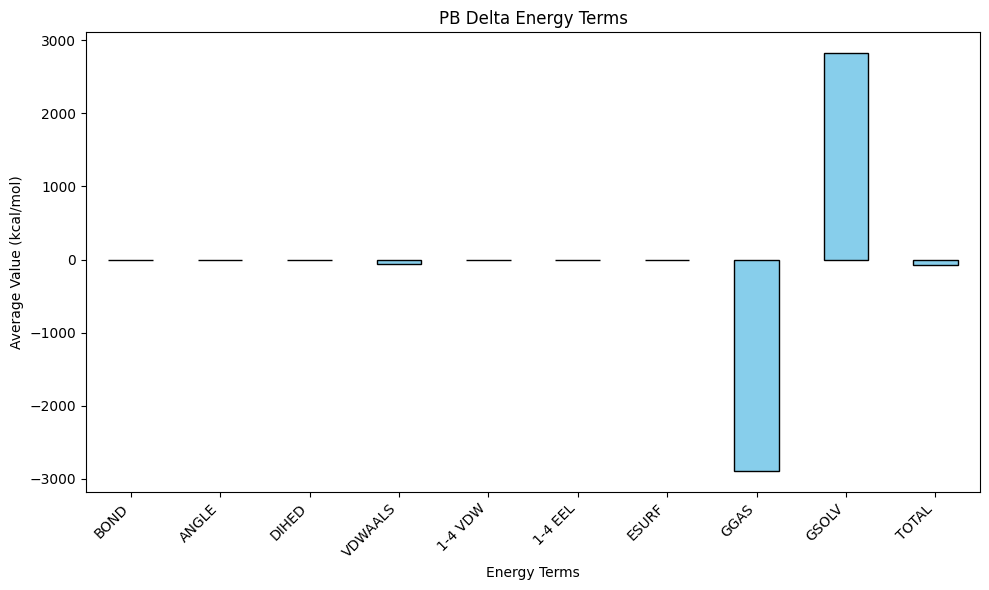

In [109]:
# Average columns from the dataframe
pb_columns = ['BOND', 'ANGLE', 'DIHED', 'VDWAALS', '1-4 VDW', '1-4 EEL', 'ESURF', 'GGAS', 'GSOLV', 'TOTAL']

df = pd.DataFrame(pb_df_delta_energy, columns=gb_columns)
# get mean of each columns in df
df['BOND'] = pd.to_numeric(df['BOND'], downcast="float")
df['ANGLE'] = pd.to_numeric(df['ANGLE'], downcast="float")
df['DIHED'] = pd.to_numeric(df['DIHED'], downcast="float")
df['VDWAALS'] = pd.to_numeric(df['VDWAALS'], downcast="float")
df['1-4 VDW'] = pd.to_numeric(df['1-4 VDW'], downcast="float")
df['1-4 EEL'] = pd.to_numeric(df['1-4 EEL'], downcast="float")
df['ESURF'] = pd.to_numeric(df['ESURF'], downcast="float")
df['GGAS'] = pd.to_numeric(df['GGAS'], downcast="float")
df['GSOLV'] = pd.to_numeric(df['GSOLV'], downcast="float")
df['TOTAL'] = pd.to_numeric(df['TOTAL'], downcast="float")
pb_columns_avg = df[pb_columns].mean()

# Plotting the bar plot
plt.figure(figsize=(10,6))
pb_columns_avg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('PB Delta Energy Terms')
plt.xlabel('Energy Terms')
plt.ylabel('Average Value (kcal/mol)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
from io import StringIO

# DECOMPOSED ENERGY FILE OF AMINO ACIDS
decomp_fh = "/home/shrikant/Projects/dev_project/gromacs/data/FINAL_DECOMP_MMPBSA.dat"
# READ THE FILE AS PYTHON STRING
with open(decomp_fh, 'r') as f:
    decomp_data = f.read()
# Close the file
f.close()

# Use StringIO to simulate reading from a file
data_io = StringIO(decomp_data)

# Read the data into pandas, skipping the first few lines of metadata
# The data starts after the first 5 lines, and we need to set the column names accordingly
column_names = [
    'Residue', 'Internal_Avg', 'Internal_Std_Dev', 'Internal_Std_Err', 
    'Van_der_Waals_Avg', 'Van_der_Waals_Std_Dev', 'Van_der_Waals_Std_Err', 
    'Electrostatic_Avg', 'Electrostatic_Std_Dev', 'Electrostatic_Std_Err', 
    'Polar_Solv_Avg', 'Polar_Solv_Std_Dev', 'Polar_Solv_Std_Err', 
    'Non_Polar_Solv_Avg', 'Non_Polar_Solv_Std_Dev', 'Non_Polar_Solv_Std_Err', 
    'Total_Avg', 'Total_Std_Dev', 'Total_Std_Err'
]

# Skip the first 6 lines of metadata and set the column headers
decomp_df = pd.read_csv(data_io, skiprows=4, names=column_names)

In [14]:
# Step 1: Find the index of the row that starts with 'Energy Decomposition Analysis (All units kcal/mol): Poisson Boltzmann model'
poisson_boltzmann_model_index = decomp_df[decomp_df['Residue'] == 'Energy Decomposition Analysis (All units kcal/mol): Poisson Boltzmann model'].index[0]
poisson_boltzmann_model_df = decomp_df.iloc[poisson_boltzmann_model_index + 1:]
poisson_boltzmann_model_df

,Residue,Internal_Avg,Internal_Std_Dev,Internal_Std_Err,Van_der_Waals_Avg,Van_der_Waals_Std_Dev,Van_der_Waals_Std_Err,Electrostatic_Avg,Electrostatic_Std_Dev,Electrostatic_Std_Err,Polar_Solv_Avg,Polar_Solv_Std_Dev,Polar_Solv_Std_Err,Non_Polar_Solv_Avg,Non_Polar_Solv_Std_Dev,Non_Polar_Solv_Std_Err,Total_Avg,Total_Std_Dev,Total_Std_Err
447,Complex:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,Total Energy Decomposition:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,Residue,Internal,NaN,NaN,van der Waals,NaN,NaN,Electrostatic,NaN,NaN,Polar Solvation,NaN,NaN,Non-Polar Solv.,NaN,NaN,TOTAL,NaN,NaN
450,NaN,Avg.,Std. Dev.,Std. Err. of Mean,Avg.,Std. Dev.,Std. Err. of Mean,Avg.,Std. Dev.,Std. Err. of Mean,Avg.,Std. Dev.,Std. Err. of Mean,Avg.,Std. Dev.,Std. Err. of Mean,Avg.,Std. Dev.,Std. Err. of Mean
451,R::LYS:741,26.104780677401443,3.105344390150108,0.07317334609928133,-7.4888833981121605,1.453956460475394,0.03426056692234039,-164.38785896724042,10.606897406132417,0.24993755198307624,125.59655857856747,8.92778841097835,0.21037156244885719,0.0,0.0,0.0,-20.175403109383673,14.281765705465581,0.33653097807433974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,L::U:20,0.0,3.728352572792365,0.08785371247531557,-0.04649805663520267,1.6019217787903222,0.03774717455339454,3.1727540255413658,7.963516369831211,0.18764976320992985,-3.136446418656302,6.908760347712439,0.16279582826422567,0.0,0.0,0.0,-0.010190449750138931,11.296695481737284,0.26619173412305247
888,L::C:21,0.0,3.880187148389364,0.09143149405253369,-0.02315602443087173,1.6937083692772161,0.03991000453588348,1.4315585785674625,7.739443539182335,0.18236978239990337,-1.4133220433092726,6.252754433324938,0.1473379138477407,0.0,0.0,0.0,-0.0049194891726819295,10.812974828711177,0.2547934947292122
889,L::C:22,0.0,3.8635958683421703,0.09104054241413434,-0.01453803442531927,1.6901916756253836,0.03982713828680434,0.8598850638534148,6.83278988285935,0.16100568442844015,-0.8436696279844531,5.462414015054998,0.1287145839698196,0.0,0.0,0.0,0.0016774014436422044,9.711287524803206,0.2288336860079176
890,L::C:23,0.0,3.763374711051517,0.08867896298604876,-0.008848417545807879,1.9460543671451782,0.0458562052527284,0.7493337034980567,11.088322914849178,0.26128170932745737,-0.732517490283176,9.774361149650153,0.23031993281368293,0.0,0.0,0.0,0.007967795669072806,15.376578220248692,0.36232879145444497


In [15]:
# Step 2: Find the index of the row that starts with 'Complex:'
mpb_cmplx_index = poisson_boltzmann_model_df[poisson_boltzmann_model_df['Residue'] == 'Complex:'].index[0]
#Find the index of the row that starts with 'Total Energy Decomposition:'
mpb_cmplx_total_index = poisson_boltzmann_model_df[poisson_boltzmann_model_df['Residue'] == 'Total Energy Decomposition:'].index[0]
#Find the index of the row that starts with 'Sidechain Energy Decomposition:'
mpb_cmplx_sidechain_index = poisson_boltzmann_model_df[poisson_boltzmann_model_df['Residue'] == 'Sidechain Energy Decomposition:'].index[0]
#Find the index of the row that starts with 'Sidechain Energy Decomposition:'
mpb_complx_backbone_index = poisson_boltzmann_model_df[poisson_boltzmann_model_df['Residue'] == 'Backbone Energy Decomposition:'].index[0]
# Step 3: Find the index of the row that starts with 'Receptor:'
mpb_receptor_index = poisson_boltzmann_model_df[poisson_boltzmann_model_df['Residue'] == 'Receptor:'].index[0]

# Step 4: Slice the DataFrame to keep only the rows from complex total energy to sidechain energy
complex_total_df = decomp_df.iloc[mpb_cmplx_total_index +3 : mpb_cmplx_sidechain_index]
#Slice the DataFrame to keep only the rows from sidechain energy to backbone energy
complex_sidechain_df = decomp_df.iloc[mpb_cmplx_sidechain_index +3 : mpb_complx_backbone_index]
#Slice the DataFrame to keep only the rows from backbone energy to receptor energy
complex_backbone_df = decomp_df.iloc[mpb_complx_backbone_index +3 : mpb_receptor_index]

print(f"COMPLEX ENERGY INDEX:{mpb_cmplx_index}\nCOMPLEX TOTAL ENERGY INDEX:{mpb_cmplx_total_index}\nCOMPLEX SIDECHAIN ENERGY INDEX:{mpb_cmplx_sidechain_index}\n\
COMPLEX BACKBONE ENERGY INDEX:{mpb_complx_backbone_index}\nRECEPTOR ENERGY INDEX:{mpb_receptor_index}")

COMPLEX ENERGY INDEX:447
COMPLEX TOTAL ENERGY INDEX:448
COMPLEX SIDECHAIN ENERGY INDEX:496
COMPLEX BACKBONE ENERGY INDEX:544
RECEPTOR ENERGY INDEX:592


In [16]:
# Print the extracted dataframes from the complex total energy to sidechain energy
print (f"COMPLEX TOTAL ENERGY INDEX: {mpb_cmplx_index + 4} COMPLEX SIDECHAIN ENERGY INDEX:{mpb_cmplx_sidechain_index - 1}")
complex_total_df.head()

COMPLEX TOTAL ENERGY INDEX: 451 COMPLEX SIDECHAIN ENERGY INDEX:495


,Residue,Internal_Avg,Internal_Std_Dev,Internal_Std_Err,Van_der_Waals_Avg,Van_der_Waals_Std_Dev,Van_der_Waals_Std_Err,Electrostatic_Avg,Electrostatic_Std_Dev,Electrostatic_Std_Err,Polar_Solv_Avg,Polar_Solv_Std_Dev,Polar_Solv_Std_Err,Non_Polar_Solv_Avg,Non_Polar_Solv_Std_Dev,Non_Polar_Solv_Std_Err,Total_Avg,Total_Std_Dev,Total_Std_Err
451,R::LYS:741,26.104780677401443,3.105344390150108,0.07317334609928133,-7.4888833981121605,1.453956460475394,0.03426056692234039,-164.38785896724042,10.606897406132417,0.24993755198307624,125.59655857856747,8.92778841097835,0.21037156244885719,0.0,0.0,0.0,-20.175403109383673,14.281765705465581,0.33653097807433974
452,R::PRO:751,28.257720155469187,2.4102901626026525,0.056795309669112594,-4.867194891726818,0.9271230858523477,0.021846433088997332,-9.444335369239313,1.4400053595582016,0.033931827624014005,-1.2681921154913938,0.9873742585490723,0.023266172531298576,0.0,0.0,0.0,12.67799777901166,3.117303200887135,0.07345513970638395
453,R::ALA:752,15.042024430871738,2.014944259024726,0.047479504722260195,-3.593855080510827,0.8119486897107101,0.019132500303513145,-4.374973348139922,1.9051186719476598,0.044891609569877935,-1.8567928928373125,1.228676309935577,0.02895213721095775,0.0,0.0,0.0,5.216403109383676,3.139806310984829,0.07398539582506496
454,R::GLY:753,10.510983897834535,1.736494947657141,0.040918213840503294,-1.9429006107717932,0.566748488876917,0.013354680871911506,-1.4024114380899502,1.4921772409629286,0.03516118921971586,-3.8077456968350916,1.570489109496731,0.037006505146052894,0.0,0.0,0.0,3.357926152137701,2.833663267641132,0.06677153866399407
455,R::LYS:754,24.546444752915047,3.204221437046871,0.07550325333816958,-4.508040533037201,1.436983646787015,0.03386062494674574,-194.48580510827318,11.110784797308447,0.26181099397119834,155.1923553581344,10.307780101186687,0.2428892470837861,0.0,0.0,0.0,-19.255045530260965,15.557372093168073,0.3665889606896903


In [17]:
# Print the extracted dataframes from the sidechain energy to backbone energy
print (f"COMPLEX SIDECHAIN ENERGY INDEX: {mpb_cmplx_sidechain_index + 3} COMPLEX BACKBONE ENERGY INDEX:{mpb_complx_backbone_index - 1}")
complex_sidechain_df.head()

COMPLEX SIDECHAIN ENERGY INDEX: 499 COMPLEX BACKBONE ENERGY INDEX:543


,Residue,Internal_Avg,Internal_Std_Dev,Internal_Std_Err,Van_der_Waals_Avg,Van_der_Waals_Std_Dev,Van_der_Waals_Std_Err,Electrostatic_Avg,Electrostatic_Std_Dev,Electrostatic_Std_Err,Polar_Solv_Avg,Polar_Solv_Std_Dev,Polar_Solv_Std_Err,Non_Polar_Solv_Avg,Non_Polar_Solv_Std_Dev,Non_Polar_Solv_Std_Err,Total_Avg,Total_Std_Dev,Total_Std_Err
499,R::LYS:741,12.881899500277623,2.4840723814393217,0.05853389037276445,-4.66629816768462,1.1020436326096315,0.0259682051373232,-157.05783176013324,10.526865061778166,0.24805169531250987,128.82551860077734,8.829015456238606,0.20804410800440165,0.0,0.0,0.0,-20.016711826762908,14.005410301729508,0.33001902736506306
500,R::PRO:751,13.07965574680733,1.617574020091086,0.0381159989818744,-2.549751804553026,0.5200526465344466,0.012254354916451894,-28.19239255968906,1.7210484078410797,0.0405542364962892,27.77773514714048,1.6501837958416645,0.0388844053508381,0.0,0.0,0.0,10.11524652970572,2.927817386353158,0.06899015632747806
501,R::ALA:752,2.910563020544142,0.8388955998049512,0.01976746870987944,-1.2189528039977788,0.3076373624917087,0.0072490688215060516,2.3019689061632427,0.15110418735154962,0.0035605709412446585,-0.3161082731815658,0.07497308007246499,0.0017666417785005889,0.0,0.0,0.0,3.67747084952804,0.9093074355484444,0.021426630779853687
502,R::GLY:753,0.543599111604664,0.2282175196827803,0.005377644942260465,-0.15764186563020544,0.03510790855893125,0.0008272715747577414,-12.657439755691282,0.7756608444015675,0.018277425075005325,11.115255413659078,0.7523693134675982,0.01772859085886511,0.0,0.0,0.0,-1.1562270960577457,1.105000059239365,0.026037869432749113
503,R::LYS:754,12.672017767906718,2.573010339101987,0.060629596078726054,-3.1023237090505273,1.0180973343817346,0.023990121304345673,-190.36269017212658,11.244332298448507,0.26495786475068805,161.14521377012773,10.506449173469697,0.24757062182325104,0.0,0.0,0.0,-19.6477823431427,15.635772685097315,0.36843636726585743


In [18]:
# Print the extracted dataframes from the backbone energy to receptor energy
print (f"COMPLEX BACKBONE ENERGY INDEX: {mpb_complx_backbone_index + 3} RECEPTOR ENERGY INDEX:{mpb_receptor_index - 1}")
complex_backbone_df.head()

COMPLEX BACKBONE ENERGY INDEX: 547 RECEPTOR ENERGY INDEX:591


,Residue,Internal_Avg,Internal_Std_Dev,Internal_Std_Err,Van_der_Waals_Avg,Van_der_Waals_Std_Dev,Van_der_Waals_Std_Err,Electrostatic_Avg,Electrostatic_Std_Dev,Electrostatic_Std_Err,Polar_Solv_Avg,Polar_Solv_Std_Dev,Polar_Solv_Std_Err,Non_Polar_Solv_Avg,Non_Polar_Solv_Std_Dev,Non_Polar_Solv_Std_Err,Total_Avg,Total_Std_Dev,Total_Std_Err
547,R::LYS:741,13.22287562465297,1.699786581655465,0.04005322959634031,-2.8225863409217102,0.8508176603626008,0.020048396347460824,-7.330029428095501,1.2012035805341295,0.02830477856591972,-3.2289683509161575,0.494586363385919,0.011654275531827045,0.0,0.0,0.0,-0.1587084952803997,2.302318576369522,0.05425110160208292
548,R::PRO:751,15.178066629650196,1.5591503466455692,0.03673932214983596,-2.317433647973348,0.7634197238763256,0.017988979209974155,18.748059966685176,1.8275861132655884,0.04306465705266234,-29.045930038867297,1.3265046560588285,0.031257333198849754,0.0,0.0,0.0,2.562762909494725,2.848410974946448,0.06711904894151619
549,R::ALA:752,12.131459189339257,1.6609813241125737,0.03913883486779928,-2.374906163242643,0.7084721818067359,0.016694212830465262,-6.67694614103276,1.8580446098584775,0.043782371364776855,-1.5406951693503608,1.1939623252975184,0.028134147933999324,0.0,0.0,0.0,1.5389117157134924,2.85283501063394,0.06722329550931821
550,R::GLY:753,9.967399777901166,1.6637831298741128,0.0392048557263367,-1.7852554136590781,0.5603290362124017,0.013203414934040498,11.255036646307607,1.364965730163383,0.032163617698478676,-14.922993337034981,1.4104782142409866,0.033236059376706685,0.0,0.0,0.0,4.514187673514714,2.633386255270069,0.06205227493645323
551,R::LYS:754,11.874416435313714,1.7652715277616626,0.04159629600820775,-1.40570738478623,0.8782492954631708,0.02069478665948228,-4.123130483064964,1.1607048865291745,0.027350480239977774,-5.95288784008884,0.7272805985597828,0.017137408372001863,0.0,0.0,0.0,0.39269072737368127,2.4007661890241896,0.05657088978927325


In [19]:
poisson_boltzmann_complex_df = decomp_df.iloc[mpb_receptor_index + 1:]
#Find the index of the row that starts with 'Total Energy Decomposition:'
mpb_receptor_total_index = poisson_boltzmann_complex_df[poisson_boltzmann_complex_df['Residue'] == 'Total Energy Decomposition:'].index[0]
#Find the index of the row that starts with 'Sidechain Energy Decomposition:'
mpb_receptor_sidechain_index = poisson_boltzmann_complex_df[poisson_boltzmann_complex_df['Residue'] == 'Sidechain Energy Decomposition:'].index[0]
#Find the index of the row that starts with 'Sidechain Energy Decomposition:'
mpb_receptor_backbone_index = poisson_boltzmann_complex_df[poisson_boltzmann_complex_df['Residue'] == 'Backbone Energy Decomposition:'].index[0]
#Find the index of the row that starts with 'Ligand:'
mpb_ligand_index = poisson_boltzmann_complex_df[poisson_boltzmann_complex_df['Residue'] == 'Ligand:'].index[0]

# Step 5: Slice the DataFrame to keep only the rows from receptor total energy to sidechain energy
mpb_receptor_total_df = decomp_df.iloc[mpb_receptor_total_index +3 : mpb_receptor_sidechain_index]
#Slice the DataFrame to keep only the rows from receptor sidechain energy to backbone energy
mpb_receptor_sidechain_df = decomp_df.iloc[mpb_receptor_sidechain_index +3 : mpb_receptor_backbone_index]
#Slice the DataFrame to keep only the rows from receptor backbone energy to the end
mpb_receptor_backbone_df = decomp_df.iloc[mpb_receptor_backbone_index +3 : mpb_ligand_index]
# Print the extracted dataframes for each receptor section
print(f"RECEPTOR INDEX:{mpb_receptor_index}\nRECEPTOR TOTAL ENERGY INDEX:{mpb_receptor_total_index}\n\
RECEPTOR SIDECHAIN ENERGY INDEX:{mpb_receptor_sidechain_index}\nRECEPTOR BACKBONE ENERGY INDEX:{mpb_receptor_backbone_index}\n\
LIGAND INDEX:{mpb_ligand_index}")

RECEPTOR INDEX:592
RECEPTOR TOTAL ENERGY INDEX:593
RECEPTOR SIDECHAIN ENERGY INDEX:617
RECEPTOR BACKBONE ENERGY INDEX:641
LIGAND INDEX:665


In [20]:
# Print the extracted dataframes from the receptor total energy to receptor sidechain energy
print (f"RECEPTOR TOTAL ENERGY INDEX: {mpb_receptor_total_index + 3} RECEPTOR SIDECHAIN ENERGY INDEX:{mpb_receptor_sidechain_index - 1}")
mpb_receptor_total_df

RECEPTOR TOTAL ENERGY INDEX: 596 RECEPTOR SIDECHAIN ENERGY INDEX:616


,Residue,Internal_Avg,Internal_Std_Dev,Internal_Std_Err,Van_der_Waals_Avg,Van_der_Waals_Std_Dev,Van_der_Waals_Std_Err,Electrostatic_Avg,Electrostatic_Std_Dev,Electrostatic_Std_Err,Polar_Solv_Avg,Polar_Solv_Std_Dev,Polar_Solv_Std_Err,Non_Polar_Solv_Avg,Non_Polar_Solv_Std_Dev,Non_Polar_Solv_Std_Err,Total_Avg,Total_Std_Dev,Total_Std_Err
596,R::LYS:741,26.104780677401443,3.105344390150108,0.07317334609928133,-7.36400555247085,1.4535460226449524,0.03425089549603598,51.6261221543587,9.358905866194265,0.2205302768445995,-87.26510993892282,7.682021028174045,0.18101669664064682,0.0,0.0,0.0,-16.898212659633536,12.584058403828925,0.29652674397007306
597,R::PRO:751,28.257720155469187,2.4102901626026525,0.056795309669112594,-4.663190449750139,0.926017478028634,0.021820380898396094,-9.319737368128818,1.4278886812137832,0.033646314074894594,-1.3715441421432537,0.8428191214506812,0.01985992132422446,0.0,0.0,0.0,12.903248195446974,3.0685855365257413,0.07230717218085853
598,R::ALA:752,15.042024430871738,2.014944259024726,0.047479504722260195,-3.4496518600777346,0.811144268470986,0.019113545177643482,-5.65694725152693,1.780521220219462,0.04195563490397133,-0.6089983342587452,1.000918346502805,0.02358532110579523,0.0,0.0,0.0,5.326426985008329,2.981618477147561,0.0702579080943046
599,R::GLY:753,10.510983897834535,1.736494947657141,0.040918213840503294,-1.4217456968350919,0.5230658571443308,0.012325357251499322,-2.185027207107163,1.188543015901356,0.02800644905353946,-3.163692948362021,0.8775372703511385,0.020678008726535656,0.0,0.0,0.0,3.7405180455302607,2.339170527270752,0.05511946923508452
600,R::LYS:754,24.546444752915047,3.204221437046871,0.07550325333816958,-3.8968445308162134,1.2665628731503107,0.02984488411897139,87.43308328706274,7.987318090615977,0.18821061937720923,-122.25510216546363,7.357661038266604,0.17337358115318577,0.0,0.0,0.0,-14.172418656302055,11.393140162570683,0.26846432586277763
601,R::LYS:756,24.712367018323153,3.0361858784878404,0.07154371695874995,-5.783202665186008,1.2379924263319653,0.029171659210365086,83.63693947806775,8.89798877113474,0.20966937322732448,-113.16939311493614,8.687060691249728,0.204699131137449,0.0,0.0,0.0,-10.603289283731261,12.860415139531089,0.30303872606537446
602,R::LEU:757,21.030853970016658,2.6512795536958573,0.0624739069212086,-6.320843975569129,1.2637494966186338,0.029778590610491953,-36.26522820655192,1.0706780887822935,0.025229117453087625,1.2861221543586894,0.6646753124876547,0.015662197351951714,0.0,0.0,0.0,-20.269096057745696,3.19601171820108,0.07530980213823621
603,R::GLN:758,27.016463631315933,3.030402487443976,0.07140743897431044,-6.455692948362021,1.1933870371016646,0.028120592026192263,-74.74687673514714,2.816182535569261,0.06635962826139231,-8.707558023320377,2.1899851036317872,0.051604111430801104,0.0,0.0,0.0,-62.893664075513605,4.830572500646624,0.11382607177762984
604,R::GLY:761,10.719321488062187,1.7506661581081495,0.041252139729775525,-1.0564319822320933,0.7348882519641823,0.017316672693643363,-7.334257634647418,2.233270510470212,0.05262407497033082,-3.9933553581343695,1.6467216401772617,0.03880282421752339,0.0,0.0,0.0,-1.6647234869516931,3.362154379736911,0.07922473489512424
605,R::ILE:762,21.02791227096058,2.862518995680609,0.06745148584842772,-0.4579838978345364,1.5191799642441015,0.03579747279024147,-12.093314269850083,1.1812635496106196,0.02783491802851059,-2.023516935036091,0.7666952075094275,0.018066161663001828,0.0,0.0,0.0,6.453097168239867,3.533430044482222,0.083260620104683


In [21]:
# Print the extracted dataframes from the receptor sidechain energy to receptor backbone energy
print (f"RECEPTOR SIDECHAIN ENERGY INDEX: {mpb_receptor_sidechain_index + 3} RECEPTOR BACKBONE ENERGY INDEX:{mpb_receptor_backbone_index - 1}")
mpb_receptor_sidechain_df

RECEPTOR SIDECHAIN ENERGY INDEX: 620 RECEPTOR BACKBONE ENERGY INDEX:640


,Residue,Internal_Avg,Internal_Std_Dev,Internal_Std_Err,Van_der_Waals_Avg,Van_der_Waals_Std_Dev,Van_der_Waals_Std_Err,Electrostatic_Avg,Electrostatic_Std_Dev,Electrostatic_Std_Err,Polar_Solv_Avg,Polar_Solv_Std_Dev,Polar_Solv_Std_Err,Non_Polar_Solv_Avg,Non_Polar_Solv_Std_Dev,Non_Polar_Solv_Std_Err,Total_Avg,Total_Std_Dev,Total_Std_Err
620,R::LYS:741,12.881899500277623,2.4840723814393217,0.05853389037276445,-4.554166018878401,1.1037299009535542,0.026007939827471415,63.374013325930036,9.231042854457613,0.21751735356279556,-88.40669961132704,7.646042742377388,0.18016891577389071,0.0,0.0,0.0,-16.70495280399778,12.290767148131293,0.28961572223955956
621,R::PRO:751,13.07965574680733,1.617574020091086,0.0381159989818744,-2.4138578567462523,0.5125671915225152,0.012077970038808039,15.503751804553024,1.2886363706476873,0.030365016983178145,-15.318667962243197,1.14686796375441,0.027024431399031688,0.0,0.0,0.0,10.850881732370906,2.419743924125267,0.05701807509443178
622,R::ALA:752,2.910563020544142,0.8388955998049512,0.01976746870987944,-1.1863314825097167,0.30993437995903184,0.007303195009463068,1.7208395335924487,0.15122503029044326,0.003563418445766014,0.2576996113270405,0.07209365434677796,0.0016987919078513994,0.0,0.0,0.0,3.702770682953915,0.9098745254353023,0.02143999350531888
623,R::GLY:753,0.543599111604664,0.2282175196827803,0.005377644942260465,-0.11331038312048862,0.014588059888224121,0.00034374839663644125,5.738464186563021,0.40747544963400273,0.009601621706630705,-7.049553026096612,0.3812999224547112,0.00898482992157241,0.0,0.0,0.0,-0.8808001110494169,0.6030936251527321,0.014211106086509752
624,R::LYS:754,12.672017767906718,2.573010339101987,0.060629596078726054,-2.645845086063298,0.77253192102693,0.018203696121225934,99.555490283176,8.010060988567904,0.18874652578051046,-124.21721876735148,7.401154887813577,0.17439845637030682,0.0,0.0,0.0,-14.635555802332037,11.231890245551526,0.26466468417924993
625,R::LYS:756,12.236349250416437,2.439103523305698,0.05747425852312536,-3.68258745141588,0.8150328956740102,0.019205175550455117,88.70009883398112,8.513607879131174,0.20061194432064924,-112.6771665741255,8.320062487420032,0.1960513023581918,0.0,0.0,0.0,-15.423305941143811,12.178606797684676,0.286972811466803
626,R::LEU:757,9.453137701277068,2.039394752656467,0.04805564836625943,-4.187973903387007,0.9032845684137434,0.02128470985708732,-18.277561354802884,0.44638472081037484,0.010518467379300794,-4.516507495835647,0.3056818142168815,0.007202988904836691,0.0,0.0,0.0,-17.528905052748474,2.2951589616436183,0.0540823947211528
627,R::GLN:758,15.396656302054415,2.4279469132075833,0.05721136771636218,-3.8981665741254856,0.8310327225279033,0.019582190374196423,-62.3318339811216,2.74548789547668,0.06469380227981464,-9.99948195446974,2.1347094981937946,0.05030161467057348,0.0,0.0,0.0,-60.83282620766241,4.322063167649699,0.10184371982461503
628,R::GLY:761,0.5824075513603554,0.221249054879358,0.005213442257218876,0.042850083287062746,0.14361142650427094,0.0033840139112237258,0.5155391449194892,0.4164826071653279,0.009813863497750866,-2.0339022765130483,0.3855170837681582,0.009084201767517794,0.0,0.0,0.0,-0.893105496946141,0.6258247119249404,0.014746734174934169
629,R::ILE:762,10.220944475291505,2.175603879157402,0.051265236837975424,-0.3450222098833981,1.044862410839612,0.024620805040822105,1.2879533592448638,0.5289655195448887,0.012464375017153348,-3.4689106052193224,0.4708288264230604,0.011094460498053708,0.0,0.0,0.0,7.694965019433649,2.515248298130547,0.05926850974356446


In [22]:
# Print the extracted dataframes from the receptor backbone energy to the end
print (f"RECEPTOR BACKBONE ENERGY INDEX: {mpb_receptor_backbone_index + 3} LIGAND INDEX:{mpb_ligand_index - 1}")
mpb_receptor_backbone_df

RECEPTOR BACKBONE ENERGY INDEX: 644 LIGAND INDEX:664


,Residue,Internal_Avg,Internal_Std_Dev,Internal_Std_Err,Van_der_Waals_Avg,Van_der_Waals_Std_Dev,Van_der_Waals_Std_Err,Electrostatic_Avg,Electrostatic_Std_Dev,Electrostatic_Std_Err,Polar_Solv_Avg,Polar_Solv_Std_Dev,Polar_Solv_Std_Err,Non_Polar_Solv_Avg,Non_Polar_Solv_Std_Dev,Non_Polar_Solv_Std_Err,Total_Avg,Total_Std_Dev,Total_Std_Err
644,R::LYS:741,13.22287562465297,1.699786581655465,0.04005322959634031,-2.80982731815658,0.8505529688068949,0.02004215923995138,-11.74787895613548,1.184558891609668,0.02791256841774816,1.1415924486396445,0.5124261498543782,0.012074646577864466,0.0,0.0,0.0,-0.19323820099944475,2.2974932214629713,0.05413739847603066
645,R::PRO:751,15.178066629650196,1.5591503466455692,0.03673932214983596,-2.2493348139922262,0.7645892130355112,0.018016536680017056,-24.823501388117716,1.6896388823082094,0.03981411244115345,13.947122709605777,1.0692349602716757,0.025195112032526824,0.0,0.0,0.0,2.05235313714603,2.6483371048660262,0.062404571994207396
646,R::ALA:752,12.131459189339257,1.6609813241125737,0.03913883486779928,-2.263337590227651,0.7070211453089754,0.016660021068614275,-7.3777978900610774,1.737013968616643,0.04093044388507513,-0.8666896168795113,0.9790565452337465,0.023070176584083356,0.0,0.0,0.0,1.6236340921710162,2.6897039065479222,0.06337932613294027
647,R::GLY:753,9.967399777901166,1.6637831298741128,0.0392048557263367,-1.3084525263742366,0.5233187734982641,0.01233131689190482,-7.923472515269294,1.1763945612491324,0.027720186737624282,3.8858523042754025,0.9536410346927913,0.022471293589011315,0.0,0.0,0.0,4.621327040533037,2.3098424683808854,0.054428392196938485
648,R::LYS:754,11.874416435313714,1.7652715277616626,0.04159629600820775,-1.250989450305386,0.8774214976961808,0.020675280696569986,-12.122403664630761,1.118249803366623,0.02635008218307273,1.962130483064964,0.6632865826263217,0.015629473763835673,0.0,0.0,0.0,0.463153803442532,2.361457974380869,0.05564464353981893
649,R::LYS:756,12.47601221543587,1.6341203023456319,0.03850589030662043,-2.100623542476402,0.890910444228002,0.02099312993616429,-5.063156024430871,1.2416450764702833,0.02925772909478709,-0.4922382009994447,0.8685582643263368,0.02046643028854843,0.0,0.0,0.0,4.819994447529151,2.4000305282694194,0.056553554913569545
650,R::LEU:757,11.577726818434204,1.5885609367783877,0.037432343927903164,-2.13288339811216,0.7507610869066988,0.01769069512043429,-17.987664075513603,1.0255504511231157,0.024165744173282624,5.802616324264298,0.6761675364971211,0.015932996458022687,0.0,0.0,0.0,-2.740204330927263,2.143857347092611,0.05051717166826438
651,R::GLN:758,11.619797890061076,1.637250788209798,0.0385796560784054,-2.557517490283176,0.7904095458996793,0.018624958779369805,-12.415053858967239,1.0569932978196126,0.02490665339770465,1.2919228206551914,0.7344451725095499,0.017306232110503493,0.0,0.0,0.0,-2.0608506385341476,2.227550658638565,0.05248929420364958
652,R::GLY:761,10.136911160466406,1.6824336201037307,0.039644329937577764,-1.0992887284841755,0.6902506331940287,0.01626484606285916,-7.849777345918934,2.441082413416755,0.057520888459388825,-1.9594519711271516,1.8748748693534738,0.044178954238764806,0.0,0.0,0.0,-0.7716068850638536,3.575061950163364,0.08424162106961353
653,R::ILE:762,10.806966129927819,1.6412127442944087,0.03867301434962612,-0.11296557468073294,0.9709332722370475,0.022878762366603383,-13.381262631871184,1.2482859107726019,0.029414211599057105,1.4453903387007219,0.8046670627967623,0.018960918366247116,0.0,0.0,0.0,-1.241871737923376,2.4170224426253637,0.05695394697121078


In [23]:
#Find the dataframe of the row that starts with 'Ligand:'
poisson_boltzmann_ligand_df = decomp_df.iloc[mpb_ligand_index + 1:]
#Find the index of the row that starts with 'Total Energy Decomposition:'
mpb_ligand_total_index = poisson_boltzmann_ligand_df[poisson_boltzmann_ligand_df['Residue'] == 'Total Energy Decomposition:'].index[0]
#Find the index of the row that starts with 'Sidechain Energy Decomposition:'
mpb_ligand_sidechain_index = poisson_boltzmann_ligand_df[poisson_boltzmann_ligand_df['Residue'] == 'Sidechain Energy Decomposition:'].index[0]
#Find the index of the row that starts with 'Backbone Energy Decomposition:'
mpb_ligand_backbone_index = poisson_boltzmann_ligand_df[poisson_boltzmann_ligand_df['Residue'] == 'Backbone Energy Decomposition:'].index[0]
#Find the index of the row that starts with 'DELTAS:'
mpb_deltas_index = poisson_boltzmann_ligand_df[poisson_boltzmann_ligand_df['Residue'] == 'DELTAS:'].index[0]

# Step 6: Slice the DataFrame to keep only the rows from ligand total energy to sidechain energy
mpb_ligand_total_df = decomp_df.iloc[mpb_ligand_total_index +3 : mpb_ligand_sidechain_index]
#Slice the DataFrame to keep only the rows from ligand sidechain energy to backbone energy
mpb_ligand_sidechain_df = decomp_df.iloc[mpb_ligand_sidechain_index +3 : mpb_ligand_backbone_index]
# Slice the DataFrame to keep only the rows from ligand backbone energy to the end
mpb_ligand_backbone_df = decomp_df.iloc[mpb_ligand_backbone_index +3 : mpb_deltas_index]
# print the extracted dataframes for each ligand section
print(f"LIGAND INDEX:{mpb_ligand_index}\nLIGAND TOTAL ENERGY INDEX:{mpb_ligand_total_index}\n\
LIGAND SIDECHAIN ENERGY INDEX:{mpb_ligand_sidechain_index}\nLIGAND BACKBONE ENERGY INDEX:{mpb_ligand_backbone_index}\nDELTAS INDEX:{mpb_deltas_index}")

LIGAND INDEX:665
LIGAND TOTAL ENERGY INDEX:666
LIGAND SIDECHAIN ENERGY INDEX:693
LIGAND BACKBONE ENERGY INDEX:720
DELTAS INDEX:747


In [24]:
# Print the extracted dataframes from the ligand total energy to ligand sidechain energy
print (f"LIGAND TOTAL ENERGY INDEX: {mpb_ligand_total_index + 3} LIGAND SIDECHAIN ENERGY INDEX:{mpb_ligand_sidechain_index - 1}")

LIGAND TOTAL ENERGY INDEX: 669 LIGAND SIDECHAIN ENERGY INDEX:692


In [25]:
# Print the extracted dataframes from the ligand sidechain energy to ligand backbone energy
print (f"LIGAND SIDECHAIN ENERGY INDEX: {mpb_ligand_sidechain_index + 3} LIGAND BACKBONE ENERGY INDEX:{mpb_ligand_backbone_index - 1}")

LIGAND SIDECHAIN ENERGY INDEX: 696 LIGAND BACKBONE ENERGY INDEX:719


In [26]:
# Print the extracted dataframes from the ligand backbone energy to the end
print (f"LIGAND BACKBONE ENERGY INDEX: {mpb_ligand_backbone_index + 3} DELTAS INDEX:{mpb_deltas_index - 1}")

LIGAND BACKBONE ENERGY INDEX: 723 DELTAS INDEX:746


In [27]:
#Find the dataframe of the row that starts with 'DELTAS:'
poisson_boltzmann_delta_df = decomp_df.iloc[mpb_deltas_index + 1:]
#Find the index of the row that starts with 'Total Energy Decomposition:'
mpb_delta_total_index = poisson_boltzmann_delta_df[poisson_boltzmann_delta_df['Residue'] == 'Total Energy Decomposition:'].index[0]
#Find the index of the row that starts with 'Sidechain Energy Decomposition:'
mpb_delta_sidechain_index = poisson_boltzmann_delta_df[poisson_boltzmann_delta_df['Residue'] == 'Sidechain Energy Decomposition:'].index[0]
# Find the index of the row that starts with 'Backbone Energy Decomposition:'
mpb_delta_backbone_index = poisson_boltzmann_delta_df[poisson_boltzmann_delta_df['Residue'] == 'Backbone Energy Decomposition:'].index[0]

# Step 7: Slice the DataFrame to keep only the rows from DELTA total energy to sidechain energy
mpb_delta_total_df = decomp_df.iloc[mpb_delta_total_index +3 : mpb_delta_sidechain_index]
# Step 7: Slice the DataFrame to keep only the rows from sidechain energy to the end
mpb_delta_sidechain_df = decomp_df.iloc[mpb_delta_sidechain_index +3 : mpb_delta_backbone_index]
# Step 8: Slice the DataFrame to keep only the rows from DELTA backbone energy to the end
mpb_delta_backbone_df = decomp_df.iloc[mpb_delta_backbone_index +3 :]

# Print the extracted dataframes for each delta section
print(f"DELTAS INDEX:{mpb_deltas_index}\nDELTAS TOTAL ENERGY INDEX:{mpb_delta_total_index}\n\
DELTAS SIDECHAIN ENERGY INDEX:{mpb_delta_sidechain_index}\nDELTAS BACKBONE ENERGY INDEX:{mpb_delta_backbone_index}")

DELTAS INDEX:747
DELTAS TOTAL ENERGY INDEX:748
DELTAS SIDECHAIN ENERGY INDEX:796
DELTAS BACKBONE ENERGY INDEX:844


In [112]:
# Print the extracted dataframes from the delta total energy to delta sidechain energy
print (f"DELTAS TOTAL ENERGY INDEX: {mpb_delta_total_index + 3} DELTAS SIDECHAIN ENERGY INDEX:{mpb_delta_sidechain_index - 1}")
mpb_delta_total_df.head()

DELTAS TOTAL ENERGY INDEX: 751 DELTAS SIDECHAIN ENERGY INDEX:795


,Residue,Internal_Avg,Internal_Std_Dev,Internal_Std_Err,Van_der_Waals_Avg,Van_der_Waals_Std_Dev,Van_der_Waals_Std_Err,Electrostatic_Avg,Electrostatic_Std_Dev,Electrostatic_Std_Err,Polar_Solv_Avg,Polar_Solv_Std_Dev,Polar_Solv_Std_Err,Non_Polar_Solv_Avg,Non_Polar_Solv_Std_Dev,Non_Polar_Solv_Std_Err,Total_Avg,Total_Std_Dev,Total_Std_Err
751,R::LYS:741,0.0,4.391620152389491,0.10348273845782409,-0.12487784564131037,2.0559147426158253,0.04844492014773625,-216.01398112159907,14.145507823917246,0.3333202407542162,212.86166851749027,11.777896798176979,0.2775306086720262,0.0,0.0,0.0,-3.2771904497501385,19.034898412568168,0.4485322832229192
752,R::PRO:751,0.0,3.4086650372071237,0.08032069721323881,-0.20400444197667963,1.3103684924229868,0.030877105778604422,-0.12459800111049417,2.02792542306042,0.04778538873685397,0.10335202665186008,1.2981725609210157,0.03058972473332406,0.0,0.0,0.0,-0.22525041643531374,4.374219523667754,0.10307271558505048
753,R::ALA:752,0.0,2.849561498538574,0.06714615951297778,-0.14420322043309272,1.147700178180813,0.0270440414346996,1.2819739033870072,2.6076297608854326,0.06144535710669842,-1.2477945585785677,1.584765916772195,0.037342919285262025,0.0,0.0,0.0,-0.110023875624653,4.3299460058721175,0.10202946851365684
754,R::GLY:753,0.0,2.4557747059690866,0.057867092961322246,-0.5211549139367019,0.7712339078090398,0.01817311015120103,0.7826157690172126,1.9076759208774505,0.04495186776912795,-0.6440527484730706,1.799029656204467,0.042391761794239265,0.0,0.0,0.0,-0.38259189339255967,3.674420535272296,0.0865828751215544
755,R::LYS:754,0.0,4.531453413118293,0.10677772487413108,-0.6111960022209882,1.9154904105153017,0.0451360059138933,-281.9188883953359,13.683814858904727,0.3224410547844979,277.447457523598,12.664339957867785,0.2984184729382697,0.0,0.0,0.0,-5.082626873958913,19.283035788206842,0.454379313306078


In [111]:
# Print the extracted dataframes from the delta sidechain energy to delta backbone energy
print (f"DELTAS SIDECHAIN ENERGY INDEX: {mpb_delta_sidechain_index + 3} DELTAS BACKBONE ENERGY INDEX:{mpb_delta_backbone_index - 1}")
mpb_delta_sidechain_df.head()

DELTAS SIDECHAIN ENERGY INDEX: 799 DELTAS BACKBONE ENERGY INDEX:843


,Residue,Internal_Avg,Internal_Std_Dev,Internal_Std_Err,Van_der_Waals_Avg,Van_der_Waals_Std_Dev,Van_der_Waals_Std_Err,Electrostatic_Avg,Electrostatic_Std_Dev,Electrostatic_Std_Err,Polar_Solv_Avg,Polar_Solv_Std_Dev,Polar_Solv_Std_Err,Non_Polar_Solv_Avg,Non_Polar_Solv_Std_Dev,Non_Polar_Solv_Std_Err,Total_Avg,Total_Std_Dev,Total_Std_Err
799,R::LYS:741,0.0,3.5130088517479208,0.08277942162362342,-0.11213214880621879,1.559717879116084,0.03675269530420147,-220.4318450860633,14.000965688470162,0.3299142959139122,217.23221821210439,11.679618296192823,0.27521480535481097,0.0,0.0,0.0,-3.31175902276513,18.633691926437297,0.43907838137549426
800,R::PRO:751,0.0,2.2875951173551834,0.05390416270356587,-0.135893947806774,0.7301916741464263,0.017206004029893557,-43.69614436424209,2.1500212366133407,0.050662415597616854,43.09640310938368,2.009580226401671,0.04735310836607515,0.0,0.0,0.0,-0.735635202665186,3.7983253291645496,0.08950252821883928
801,R::ALA:752,0.0,1.1863775346592744,0.02795542234329729,-0.03262132148806219,0.4366921875663045,0.010290075613190479,0.581129372570794,0.21377905702270672,0.00503742160705865,-0.5738078845086064,0.10401181535106933,0.0024509012872258075,0.0,0.0,0.0,-0.025299833425874524,1.286355963324229,0.03031128219136052
802,R::GLY:753,0.0,0.3227483115065367,0.0076051384109718295,-0.04433148250971683,0.038018110614346574,0.0008958466490378124,-18.395903942254304,0.8761769156923648,0.02064595376265469,18.164808439755692,0.8434744896626535,0.019875364212024352,0.0,0.0,0.0,-0.27542698500832874,1.2588673685574918,0.02966354969990822
803,R::LYS:754,0.0,3.6387861176842264,0.085743197055737,-0.4564786229872293,1.2780171169748675,0.03011478827206255,-289.9181804553026,13.805654127150575,0.32531203649335944,285.3624325374792,12.851558968004966,0.302830042060389,0.0,0.0,0.0,-5.012226540810661,19.25182448362105,0.4536438600662021


In [82]:
# Print the extracted dataframes from the delta backbone energy to end
print (f"DELTAS BACKBONE ENERGY INDEX: {mpb_delta_backbone_index + 3} DELTA ENERGY END INDEX: {mpb_delta_backbone_df.index[-1]}")
mpb_delta_backbone_df.head()

DELTAS BACKBONE ENERGY INDEX: 847 DELTA ENERGY END INDEX: 891


,Residue,Internal_Avg,Internal_Std_Dev,Internal_Std_Err,Van_der_Waals_Avg,Van_der_Waals_Std_Dev,Van_der_Waals_Std_Err,Electrostatic_Avg,Electrostatic_Std_Dev,Electrostatic_Std_Err,Polar_Solv_Avg,Polar_Solv_Std_Dev,Polar_Solv_Std_Err,Non_Polar_Solv_Avg,Non_Polar_Solv_Std_Dev,Non_Polar_Solv_Std_Err,Total_Avg,Total_Std_Dev,Total_Std_Err
847,R::LYS:741,0.0,2.4038612369169607,0.05664382051198792,-0.01275902276513049,1.2030507237565309,0.028348304060462754,4.417849528039977,1.687029878093313,0.03975263469685023,-4.370560799555802,0.7121771057131013,0.01678151447730736,0.0,0.0,0.0,0.03452970571904499,3.252559904100843,0.07664228557912434
848,R::PRO:751,0.0,2.2049715660048763,0.05195724765669227,-0.06809883398112161,1.0804657974659204,0.025459751902940496,43.571561354802895,2.488965759910922,0.05864919638443676,-42.993052748473076,1.703783437768111,0.040147410240705346,0.0,0.0,0.0,0.5104097723486952,3.88936170897045,0.09164768047579741
849,R::ALA:752,0.0,2.3489823154084233,0.05535067108552273,-0.11156857301499168,1.0009054562285151,0.023585017363477654,0.7008517490283176,2.5435304793521705,0.059934942053467576,-0.6740055524708496,1.5440523802626958,0.03638355847897435,0.0,0.0,0.0,-0.08472237645752355,3.920864025032991,0.09238999101741881
850,R::GLY:753,0.0,2.3529446671155267,0.05544403867906585,-0.47680288728484177,0.7667014852721015,0.01806630959020189,19.178509161576905,1.801953275825152,0.04246065303575361,-18.808845641310384,1.7026097661820163,0.040119754217286946,0.0,0.0,0.0,-0.10713936701832312,3.5028695948009854,0.08254050340246864
851,R::LYS:754,0.0,2.496470935831617,0.05882604595929324,-0.15471793448084398,1.241446861368204,0.029253058417256905,7.999273181565796,1.6117439177307897,0.03797862030685292,-7.915018323153804,0.9843201510350076,0.023194206514627468,0.0,0.0,0.0,-0.07046307606885065,3.367515710301695,0.07935106758086884


In [84]:
# Average columns from the dataframe
avg_columns = ['Internal_Avg', 'Van_der_Waals_Avg', 'Electrostatic_Avg', 'Polar_Solv_Avg', 'Non_Polar_Solv_Avg', 'Total_Avg']

df = pd.DataFrame(mpb_delta_backbone_df, columns=avg_columns)
# get mean of each columns in df
df['Internal_Avg'] = pd.to_numeric(df['Internal_Avg'], downcast="float")
df['Van_der_Waals_Avg'] = pd.to_numeric(df['Van_der_Waals_Avg'], downcast="float")
df['Electrostatic_Avg'] = pd.to_numeric(df['Electrostatic_Avg'], downcast="float")
df['Polar_Solv_Avg'] = pd.to_numeric(df['Polar_Solv_Avg'], downcast="float")
df['Non_Polar_Solv_Avg'] = pd.to_numeric(df['Non_Polar_Solv_Avg'], downcast="float")
df['Total_Avg'] = pd.to_numeric(df['Total_Avg'], downcast="float")
df_avg = df[avg_columns].mean()

In [77]:
df_avg

Internal_Avg           0.00
Van_der_Waals_Avg     -0.47
Electrostatic_Avg     11.51
Polar_Solv_Avg       -11.40
Non_Polar_Solv_Avg     0.00
Total_Avg             -0.36
dtype: float32

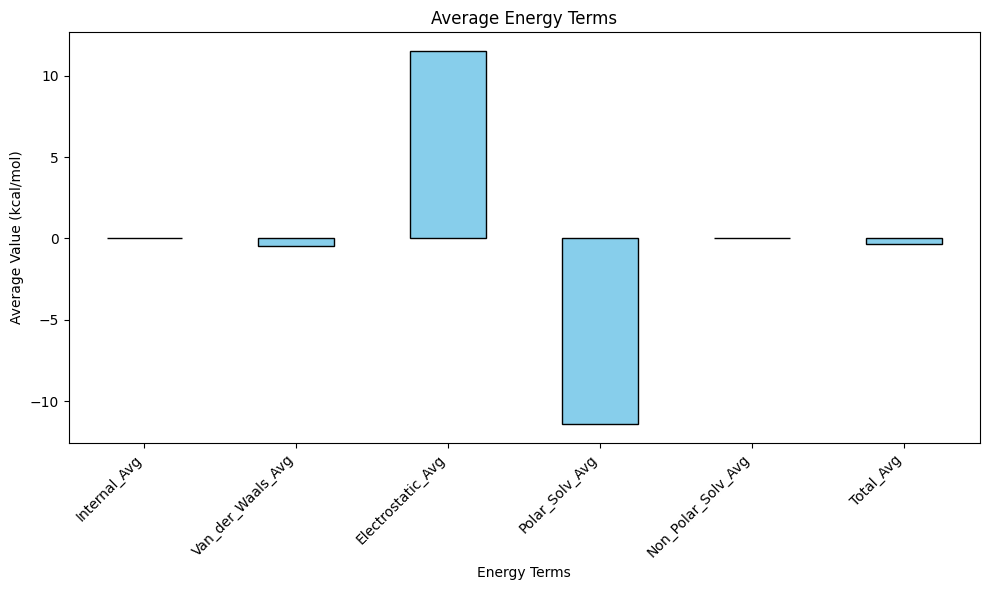

In [86]:
# Plotting the bar plot
plt.figure(figsize=(10,6))
df_avg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Energy Terms')
plt.xlabel('Energy Terms')
plt.ylabel('Average Value (kcal/mol)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [85]:
# Standard deviation columns from the database
sd_columns = ['Internal_Std_Dev', 'Van_der_Waals_Std_Dev', 'Electrostatic_Std_Dev', 'Polar_Solv_Std_Dev', 'Non_Polar_Solv_Std_Dev', 'Total_Std_Dev']
df = pd.DataFrame(mpb_delta_backbone_df, columns=sd_columns)
# get standard deviation of each columns in df
df['Internal_Std_Dev'] = pd.to_numeric(df['Internal_Std_Dev'], downcast="float")
df['Van_der_Waals_Std_Dev'] = pd.to_numeric(df['Van_der_Waals_Std_Dev'], downcast="float")
df['Electrostatic_Std_Dev'] = pd.to_numeric(df['Electrostatic_Std_Dev'], downcast="float")
df['Polar_Solv_Std_Dev'] = pd.to_numeric(df['Polar_Solv_Std_Dev'], downcast="float")
df['Non_Polar_Solv_Std_Dev'] = pd.to_numeric(df['Non_Polar_Solv_Std_Dev'], downcast="float")
df['Total_Std_Dev'] = pd.to_numeric(df['Total_Std_Dev'], downcast="float")
df_sd = df[sd_columns].std()

In [89]:
df_sd

Internal_Std_Dev         0.71
Van_der_Waals_Std_Dev    0.33
Electrostatic_Std_Dev    5.06
Polar_Solv_Std_Dev       4.86
Non_Polar_Solv_Std_Dev   0.00
Total_Std_Dev            6.78
dtype: float32

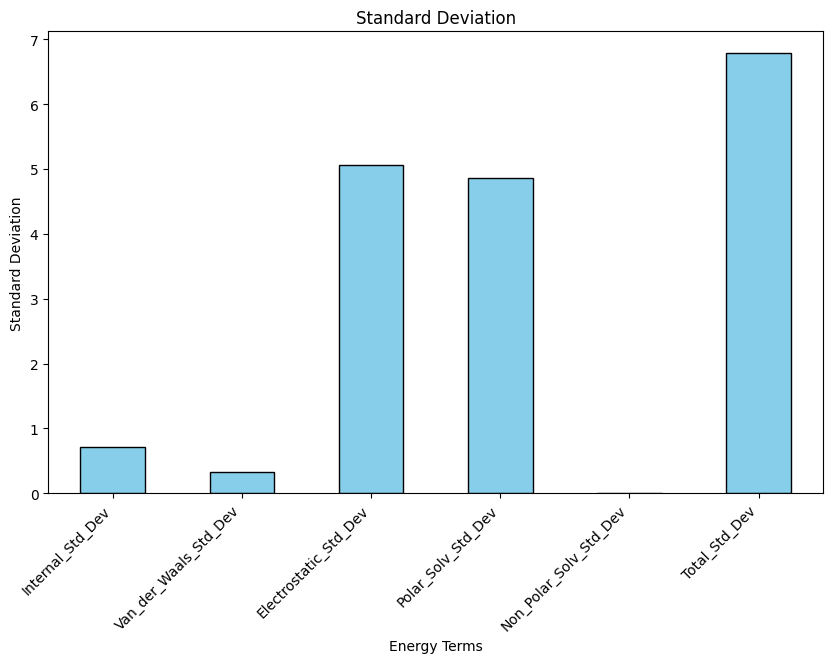

In [102]:
labels_energy = ['Internal_Std', 'Van_der_Waals', 'Electrostatic', 'Polar_Solv', 'Non_Polar_Solv', 'Total']
# Plotting the bar plot
#fig, ax = plt.subplots()
plt.figure(figsize=(10,6))

df_sd.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Standard Deviation')
plt.xlabel('Energy Terms')
plt.ylabel('Standard Deviation')
# set xticks
#plt.xticks(labels=[lab for lab in labels_energy])
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
plt.show()

In [91]:
# Standard deviation columns from the database
sd_columns = ['Internal_Std_Err', 'Van_der_Waals_Std_Err', 'Electrostatic_Std_Err', 'Polar_Solv_Std_Err', 'Non_Polar_Solv_Std_Err', 'Total_Std_Err']
df = pd.DataFrame(mpb_delta_backbone_df, columns=sd_columns)
# get standard error of each columns in df
df['Internal_Std_Err'] = pd.to_numeric(df['Internal_Std_Err'], downcast="float")
df['Van_der_Waals_Std_Err'] = pd.to_numeric(df['Van_der_Waals_Std_Err'], downcast="float")
df['Electrostatic_Std_Err'] = pd.to_numeric(df['Electrostatic_Std_Err'], downcast="float")
df['Polar_Solv_Std_Err'] = pd.to_numeric(df['Polar_Solv_Std_Err'], downcast="float")
df['Non_Polar_Solv_Std_Err'] = pd.to_numeric(df['Non_Polar_Solv_Std_Err'], downcast="float")
df['Total_Std_Err'] = pd.to_numeric(df['Total_Std_Err'], downcast="float")
df_sd_err = df[sd_columns].std()

In [92]:
df_sd_err

Internal_Std_Err         0.02
Van_der_Waals_Std_Err    0.01
Electrostatic_Std_Err    0.12
Polar_Solv_Std_Err       0.11
Non_Polar_Solv_Std_Err   0.00
Total_Std_Err            0.16
dtype: float32

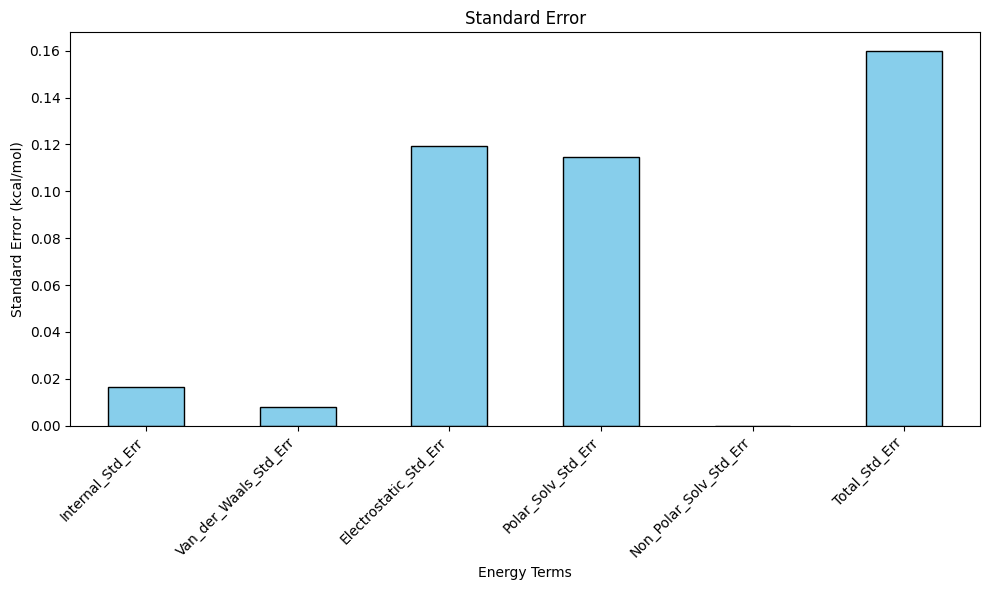

In [94]:
# Plotting the bar plot
plt.figure(figsize=(10,6))
df_sd_err.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Standard Error')
plt.xlabel('Energy Terms')
plt.ylabel('Standard Error (kcal/mol)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()